# <font color =   #0000cc> <i> Clase 14 Programación I MCD 

## <font color= #0000FF> <i> Combinando las Interfaces Gráficas con SQL Server

### <b> <font color=  #6600CC > <i>  Filtrando información desde una interfaz gráfica

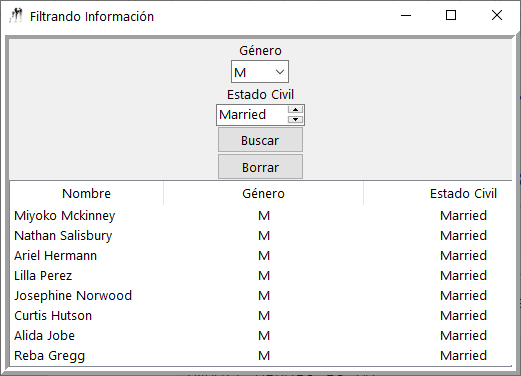

In [1]:
from IPython.display import Image
Image("Mostrando filtro en una tabla.png", width=450,height=700)

Utilizando Cajas Combo y filtrando dos valores de nuestros datos

In [2]:
import pyodbc
import pandas as pd
import tkinter as tk

from tkinter import *
from tkinter import ttk #Importamos todas las funciones que contiene tkinter
from tkinter.ttk import *
from tkinter import messagebox

class General:
	def __init__(self, raiz):
        ##StringVar() is a special Tkinter variable that allows you to track and update string values in widgets dynamically.
		self.genero = StringVar() 
		self.label_genero = Label(raiz, text = "Género")
        ##grid(column=0, row=0) specifies its position in the grid layout (first column, first row).
		self.label_genero.grid(column=0, row=0)
        ##A combobox lets users select one option from a dropdown.
		self.genero = Combobox(raiz, values=('F', 'M'), width=5)
        ##Places it in the grid layout
		self.genero.grid(column=0, row=2)

		self.estado = StringVar()
		self.label_estado = Label(raiz, text = "Estado Civil")
		self.label_estado.grid(column=0, row=5)
		self.estado = Spinbox(raiz, values=("Married", "Single", "Divorced", "Widow", "NULL"), width=10)
		self.estado.grid(column=0,row=6)

		#Creamos los botones
		#Con command le decimos cual función queremos que lleve a cabo
		self.boton_buscar= Button(raiz, text="Buscar", command=self.buscar)
		self.boton_buscar.grid(column=0, row=20)

		self.boton_borrar=Button(raiz, text="Borrar", command=self.borrar)
		self.boton_borrar.grid(column=0, row=30)

		#Tabla 
        #The Treeview widget is a versatile component for displaying tabular data with rows and columns
		self.tabla=ttk.Treeview(raiz, column=("c1", "c2", "c3"), show='headings', height=8)
		self.tabla.column("# 1",anchor="w", stretch=NO, width=100)
		self.tabla.heading("# 1", text="Nombre")
		self.tabla.column("# 2", anchor=CENTER, stretch=NO)
		self.tabla.heading("# 2", text="Género")
		self.tabla.column("# 3", anchor=CENTER, stretch=NO)
		self.tabla.heading("# 3", text="Estado Civil")
		self.tabla.grid(column=0, row=40)

	def buscar(self):
		server = 'JESS\SQLEXPRESS'
		bd = 'DB_Python'
		genero_valor = "'" + self.genero.get() + "'"
		#print(genero_valor)

		estado = "'" + self.estado.get() + "'"
		#print(estado)

		try:
				conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd)
				print('Conexión exitosa')
		except:
				print('La conexión no fué exitosa')

		#Creamos un cursor para almacenar la información en memoria
		cursor = conexion.cursor()
        ##Los valores de Genero y Estado ya fueron capturados lineas anteriores con '.get()'
        ##A cursor is an object used to execute SQL commands and interact with the database. 
		cursor.execute("SELECT Nombre, Genero, Estado_Civil FROM Datos_Personales_Python WHERE genero= " + genero_valor + "AND Estado_Civil = " + estado)
        ##'.fetchall()' retrieves all rows of a query result that have been executed using the cursor.
		datos_clientes = cursor.fetchall()
		#print(datos_clientes)

		# messagebox.showinfo("Resultados", datos_clientes)
		# Agregamos los datos al treeview
		#Recorremos cada una de las tuplas contenidas en datos clientes
		for tupla in datos_clientes:
			'''El parámetro '' indica que el elemento no tiene un antecesor
			tk.END termina la línea
			Con values le indicamos la posición de los valores que queremos que despliegue
			'''
			self.tabla.insert('', tk.END, values=(tupla[0], tupla[1], tupla[2]))


		conexion.commit()

		#Nos aseguramos de cerrar la conexión
		conexion.close()

	#def desplegar_resultados(self):

	def borrar(self):
        #Assumes self.genero is a StringVar linked to a widget like a Combobox or an Entry.
        #set("") clears the current value, resetting the input to an empty string.
		self.genero.set("")
		self.estado.set("")
        #Deletes all rows in the table by unpacking (*) the list of rows into individual arguments.
		self.tabla.delete(*self.tabla.get_children()) #Borramos el contenido de la tabla


#Creamos el objeto que será la raiz de la aplicación
raiz = Tk()
#Le agregamos un título
raiz.title("Filtrando Información")
#Determinamos si se podrá cambiar su tamaño
raiz.resizable(1,1)
#Asignamos un logotipo
raiz.iconbitmap('pikachu_icon.ico')
#Asignamos un tipo de cursor, un color de background y un borde a la raiz
raiz.config(bd=8)
raiz.config(relief="ridge")
estructura = General(raiz)

raiz.mainloop()

Conexión exitosa


## <font color= #0000FF> <i> Depurando los Scripts con Spyder

En caso de tener que actualizar la versión de Spyder: 

<b> conda install spyder=5.1.5
    

Si spyder te muestra un mensaje diciendo que falta instalar alguna librería, puedes instalarla desde el prompt de Anaconda con

<b> pip install nombre_librería

Si ya se encuentra instalada, pero sigue arrojando error, puedes desinstalarla primero con 

<b> pip uninstall nombre_libreria

y después instalarla

<b> Cierra Spyder y Anaconda Navigator y vuelve a abrirlos para que spyder tome en cuenta la librería 

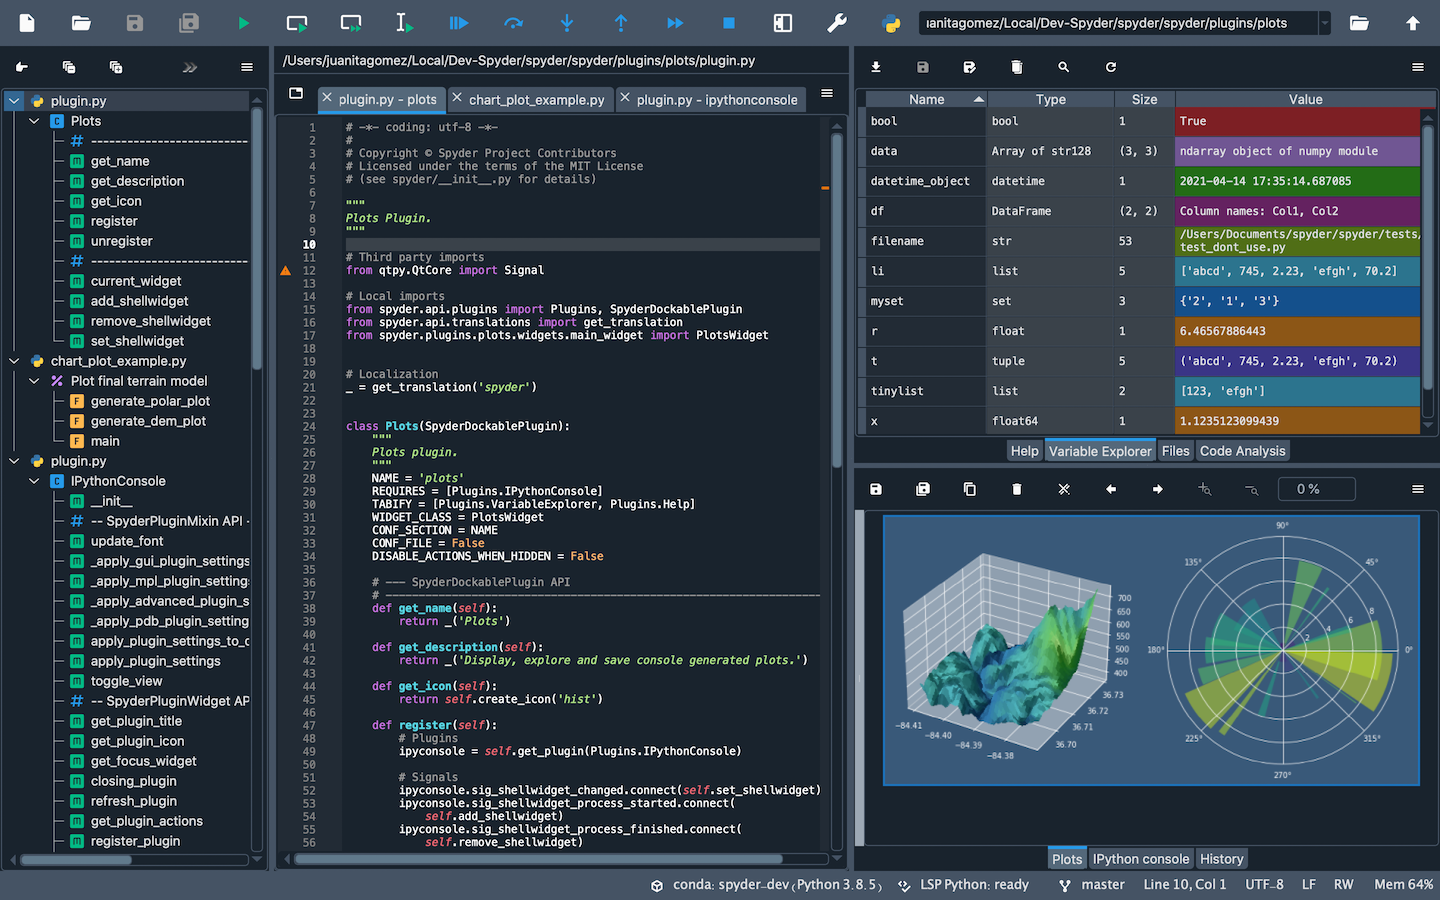

In [6]:
from IPython.display import Image
Image("Spider_Index_Front_Page.png", width=700,height=700)

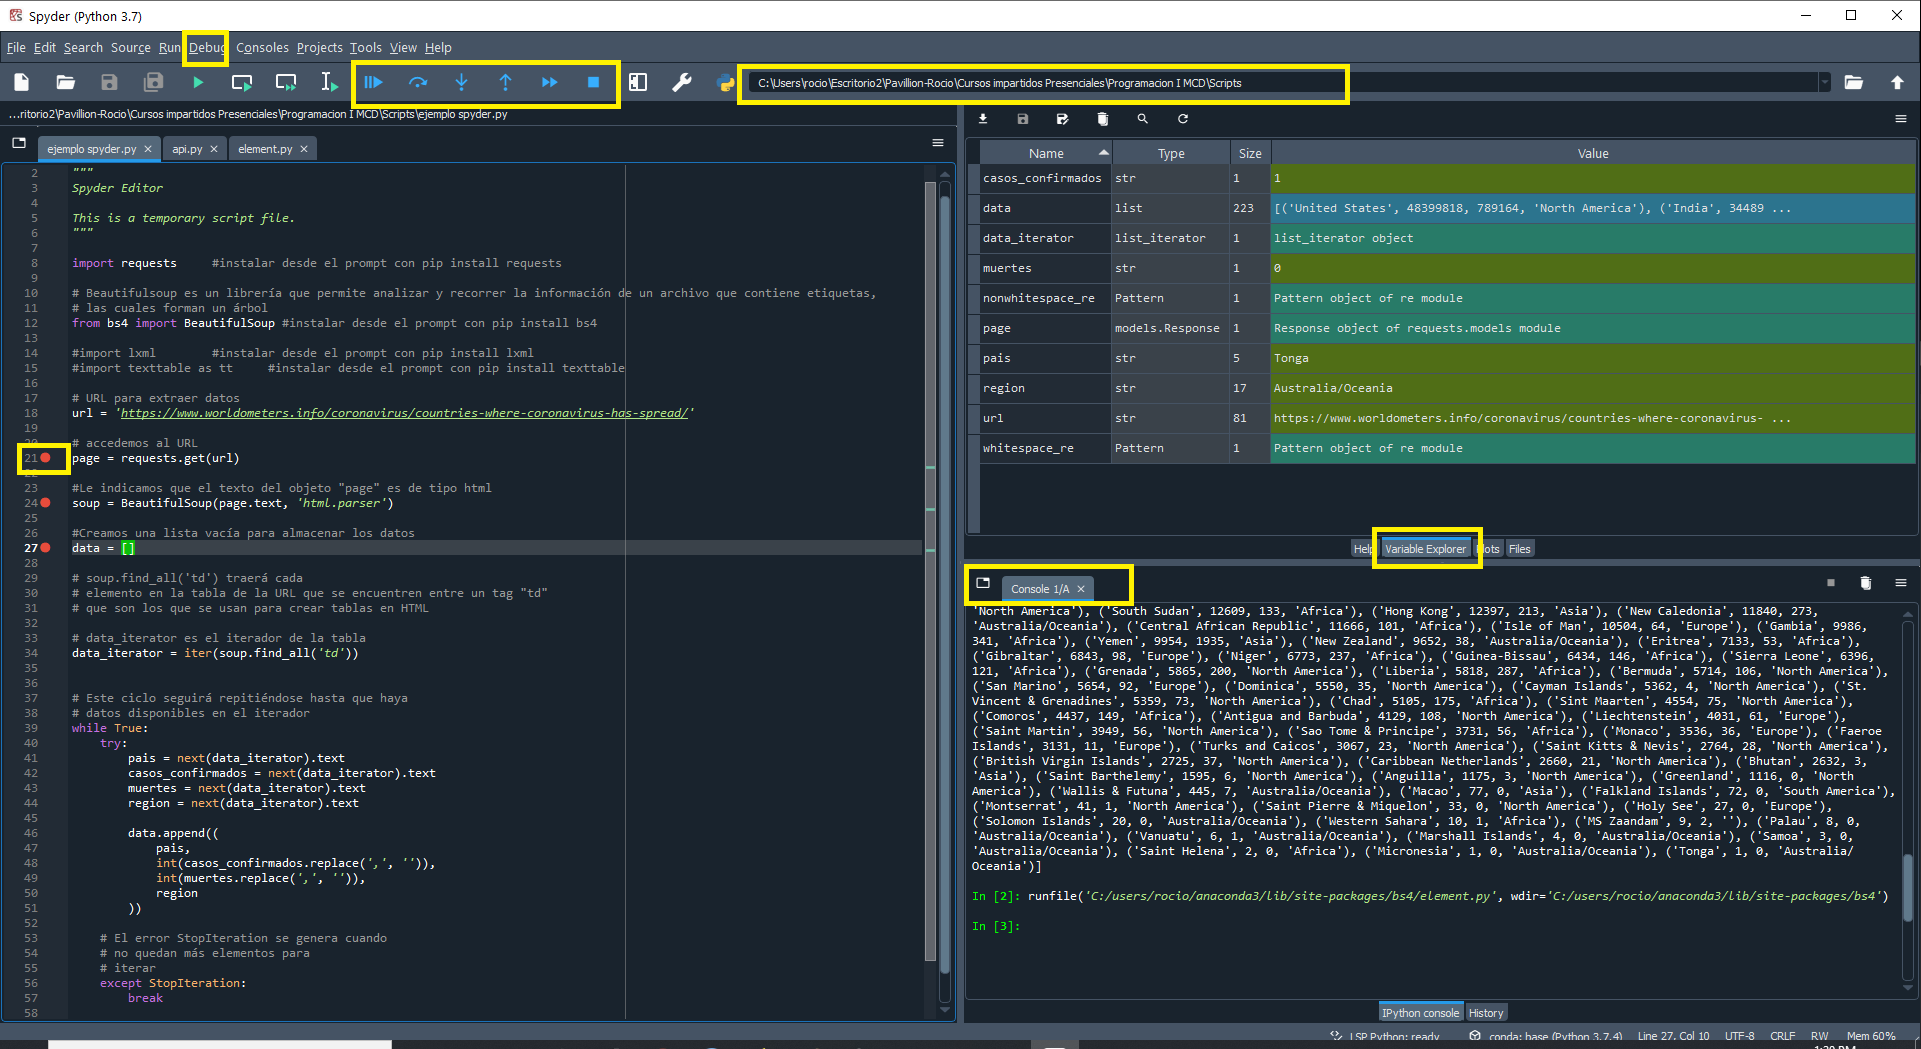

In [7]:
Image("Spyder.png", width=950,height=700)

<b> Copia el siguiente código en el editor de Spyder

<b> Copia el siguiente código en el editor de Spyder

## <font color= #0000FF> <i> Git y Github

### <b> <font color=  #6600CC > <i>  Git

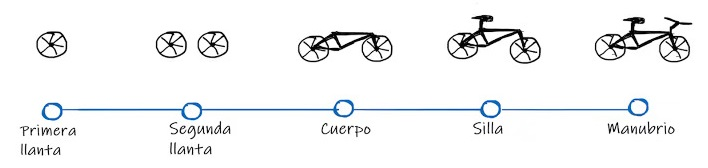

In [16]:
from IPython.display import Image
Image("Versiones.jpg", width=700)


Imagen tomada de: https://www.youtube.com/watch?v=VwhdFwrzrXo&ab_channel=Dero

Git es un software gratuito útil en el control de versiones ya que guarda un registro de los cambios que van teniendo nuestros archivos

El enlace para descargar Git es: https://git-scm.com/downloads

Una vez instalado, podemos  abrir el Git Bash


<b> <i> Nota importante: Es necesario tener la versión de Git más reciente

### <font color= #33691e> <i> Ramas

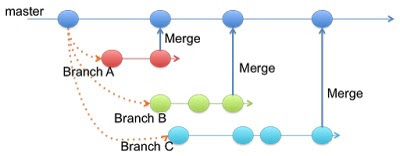

In [21]:
from IPython.display import Image
Image("Ramas.png", width=400)

Otra cosa que Git nos ofrece son las Ramas

Se pueden tomar uno o más archivos y dividirlos en tantas partes como desarrolladores estén involucrados en el desarrollo del script

Cada desarrollador trabaja sus versiones de manera independiente y Git fusiona las versiones finales

### <font color= #33691e> <i> Secciones Principales de Git

- Directorio de Trabajo

- Área de ensayo (Staging area)

- Repositorio Local

En el directorio de trabajo se agregan, borran y editan los archivos

En el área de ensayo se almacenan los archivos de forma temporal y

En el repositorio local se almacena los respaldos de las versiones de los archivos una vez que se han confirmado los cambios


### <font color= #33691e> <i> Algunos Comandos de Git

- <b> git init

- <b> git add

- <b> git commit
    
- <b> git status


Puedes consultar la lista completa de los comandos en https://git-scm.com/docs/git#_git_commands

Otro enlace que podría ser de utilidad es: https://www.hostinger.es/tutoriales/comandos-de-git

Crea una carpeta llamada "Utilizando Git" y dentro de ella, otra carpeta que se llame "Ejemplo de Git"

Dentro de esta última carpeta, copia el script "Histogramas en Python sin funciones.py" que hicimos en Sublime Text 

Ve al Explorador de archivos y con el botón derecho del mouse (sin posicionarte sobre un archivo) selecciona la opción "Git Bash here" para abrir la ventana de comandos de Git ya en el directorio de nuestro proyecto

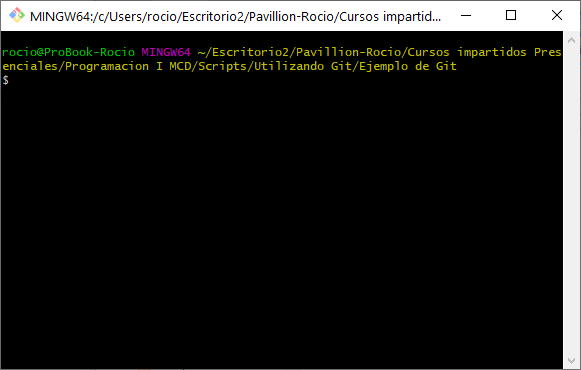

In [24]:
from IPython.display import Image
Image("git bash.png", width=600)

Teclea el comando <b> git init 

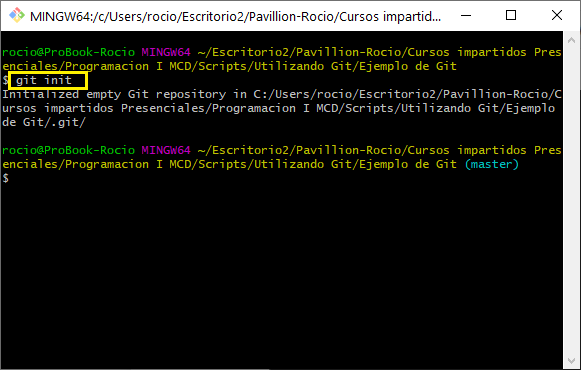

In [26]:
from IPython.display import Image
Image("git init.png", width=600)

 Y verás como se crea una carpeta oculta llamada .git, que es el repositorio

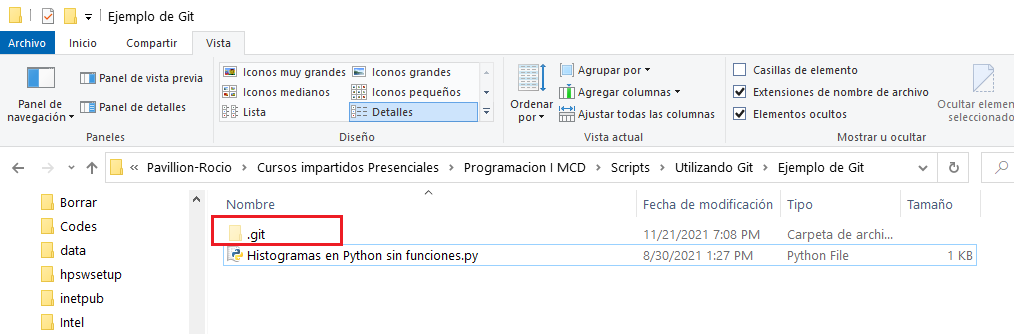

In [28]:
from IPython.display import Image
Image("repositorio.png", width=800)

Dentro de la carpeta Ejemplo Git crea ahora una carpeta llamada "Imagenes" y copia en ella la imágen "Ramas.png"

Para indicarle que queremos que le de seguimiento a los cambios de todos los archivos y carpetas que se encuentren dentro del repositorio, utilizamos el comando git add agregándole un espacio y un punto

<b> git add .

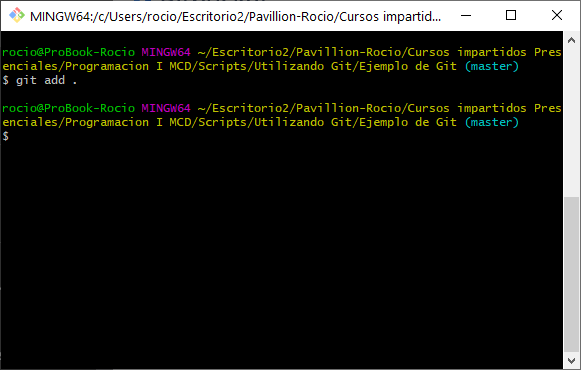

In [31]:
from IPython.display import Image
Image("git add.png", width=600)

Para indicarle que queremos que le de seguimiento a los cambios de todos los archivos y carpetas que se encuentren dentro del repositorio, utilizamos el comando git add agregándole un espacio y un punto

<b> git add .

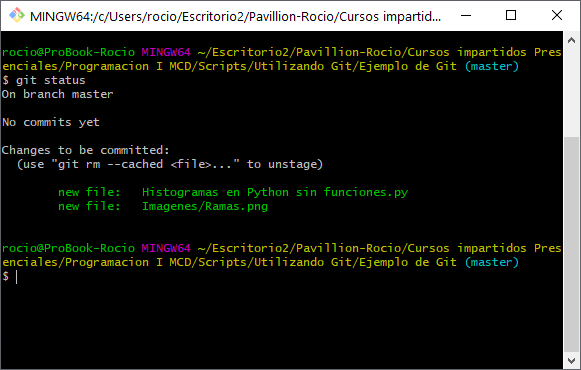

In [33]:
from IPython.display import Image
Image("git status.png", width=600)

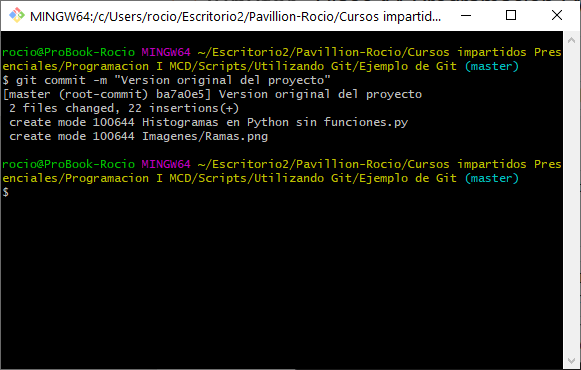

In [34]:
from IPython.display import Image
Image("git commit.png", width=600)

Agrega los cambios en el área de ensayo con el comando git add

<b> git add "Histogramas en Python sin funciones.py"

y envíalos al repositorio local con  el comando git commit -m

<b> git commit -m "Cambio de título del Histograma"

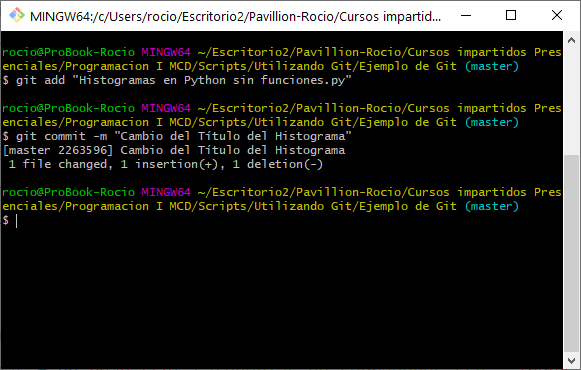

In [35]:
from IPython.display import Image
Image("add y commit.png", width=600)

Una forma de llevar a cabo tanto el comando add como el commit en una sola linea es utilizando el parámetro -am en lugar de solamente -m

<b> git commit -am "Cambio de título del Histograma"

Si queremos ver cuantas versiones tengo guardadas en el repositorio, utilizamos el comando 

<b> git log --oneline

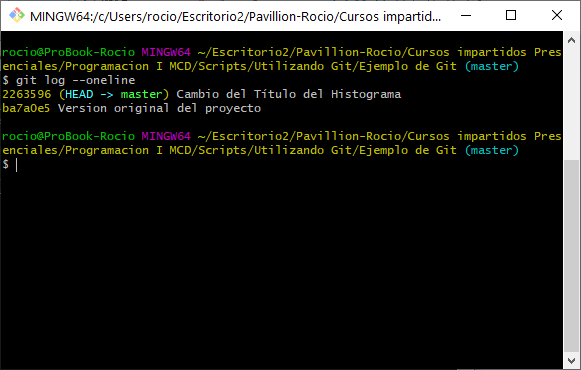

In [37]:
from IPython.display import Image
Image("git log.png", width=600)

Si quisiéramos regresar a la versión anterior del archivo, utilizamos el comando reset --hard y el código de la versión a la que queremos regresar

<b> git reset --hard ba7a0e5

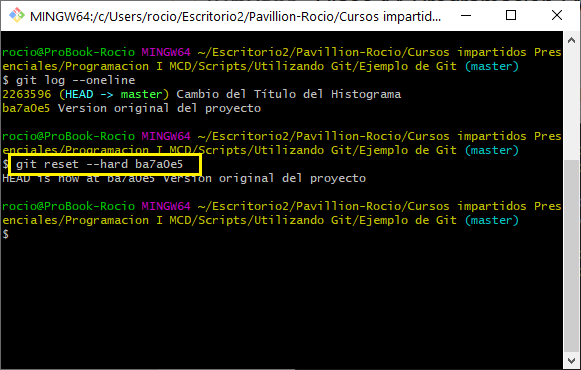

In [38]:
from IPython.display import Image
Image("git reset.png", width=600)

Si abrimos el archivo "Histogramas en Python sin funciones.py" con Sublyme Text, veremos que el título del histograma volvió a ser "Histograma Tiempo"

Vamos a modificarle algo ahora a la imágen que tenemos en la carpeta "imágenes" y a guardar los cambios


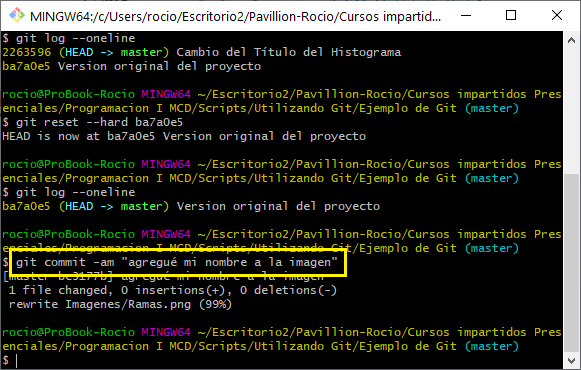

In [42]:
from IPython.display import Image
Image("commit am.png", width=600)

### <b> <font color=  #6600CC > <i>  Github

Github, junto con Git es especialmente útil cuando se trabaja en equipo en el desarrollo de software ya que se suben los archivo a un servidor para poder compartirlo

Para poder utilizar Github es necesario registrarse en la página https://github.com/

Una vez habiendo ingresado en la página de github con tu cuenta, dá clic en el botón "Create repository", coloca el nombre que tu quieras y determina si desdeas que otras personas pueden ver tu contenido


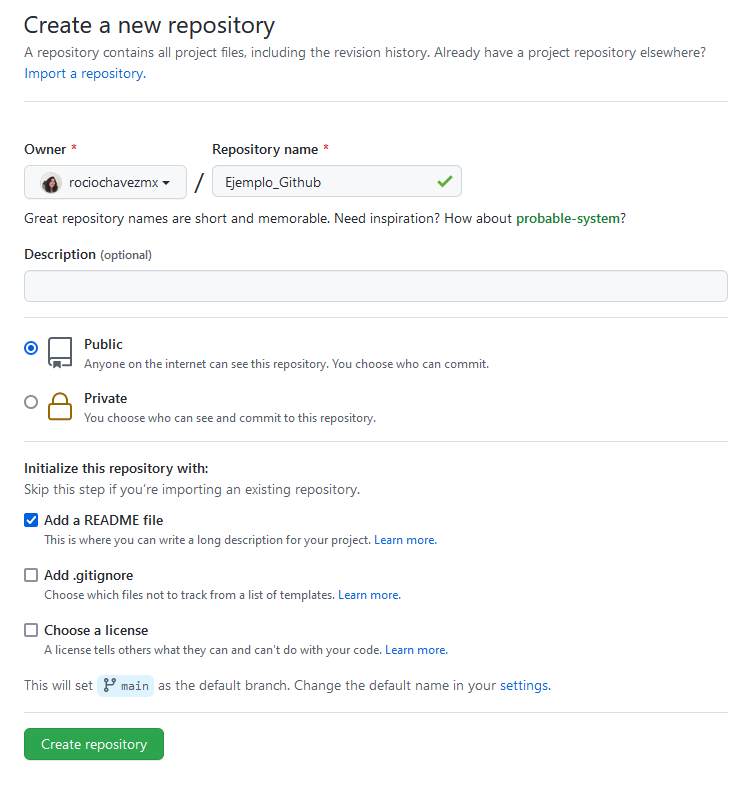

In [53]:
from IPython.display import Image
Image("github nuevo repositorio.png", width=600)

Vuelve a dar clic en el botón "Create repository"


git remote set-url origin https://github.com/rociochavezmx/Ejemplo_Github.git

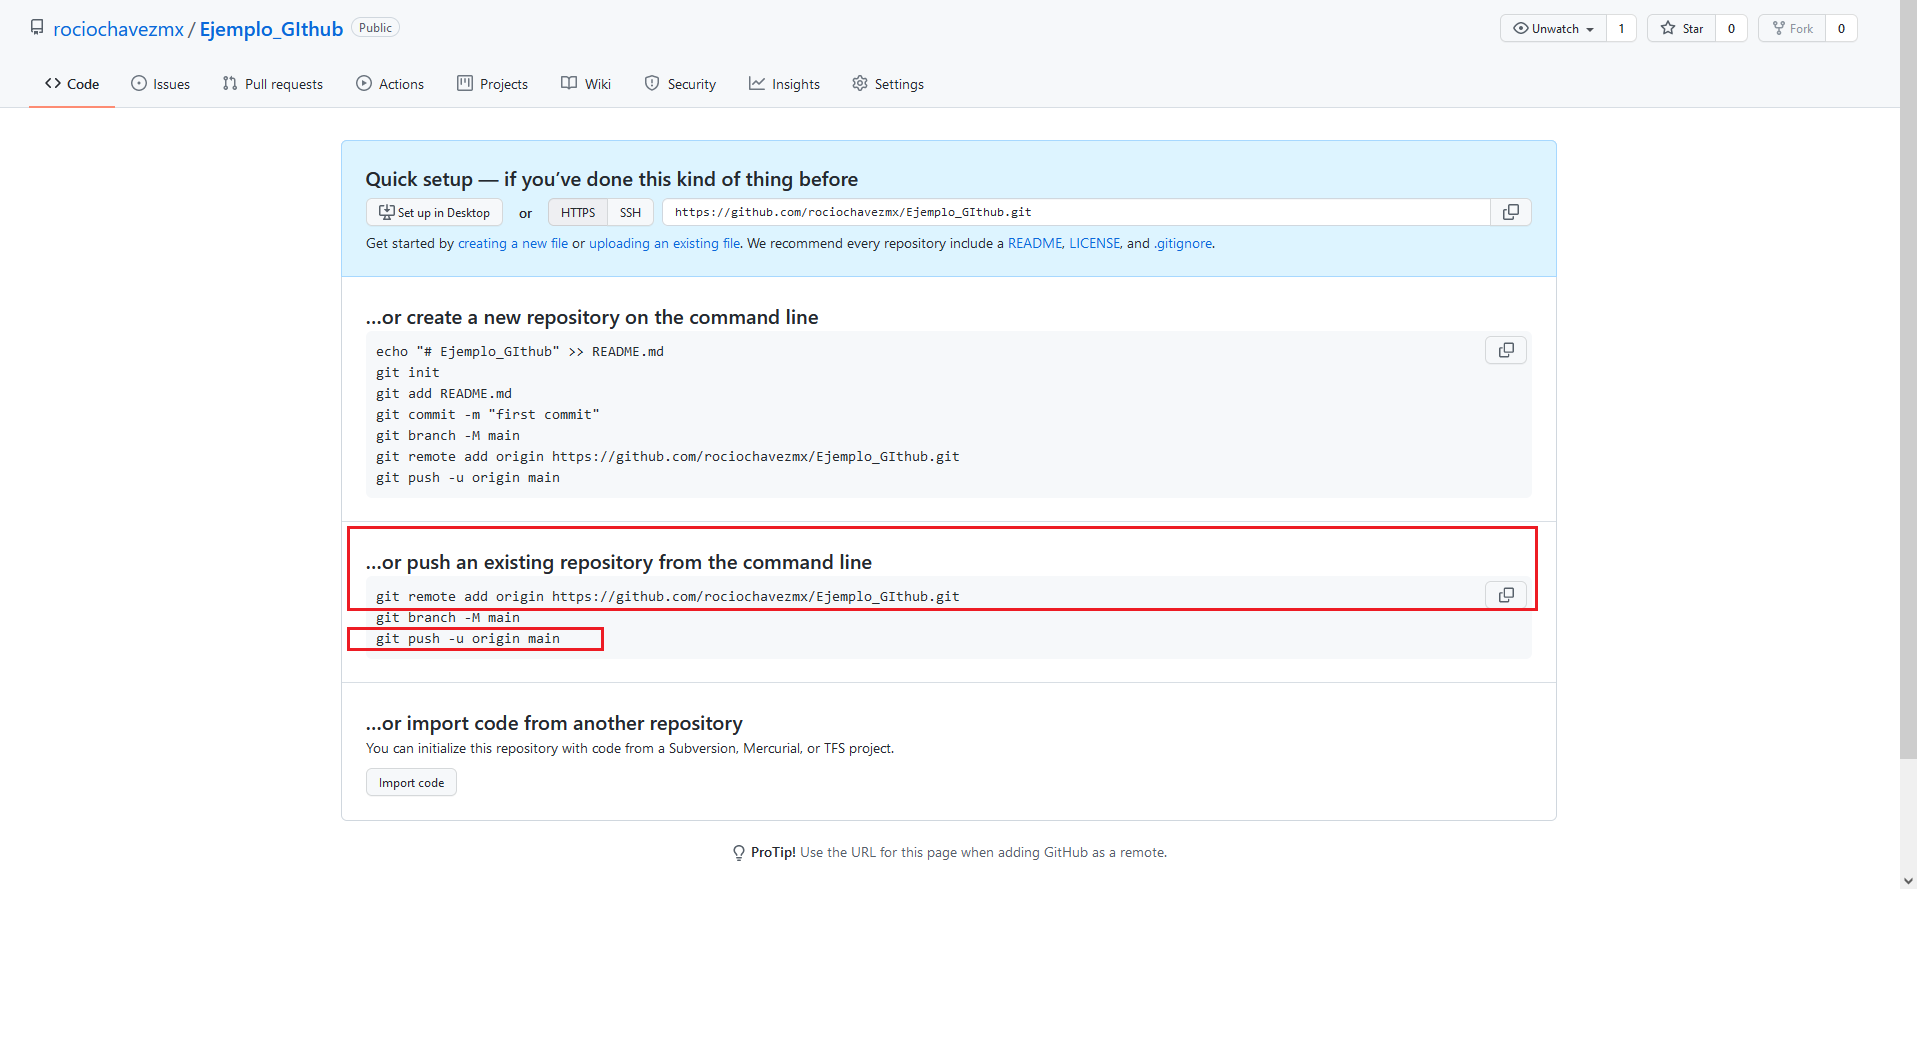

In [45]:
from IPython.display import Image
Image("github setup.png", width=800)

Copiamos el código que aparece en el primer rectángulo rojo y nos lo llevamos al prompt de Git Bash utilizando el botón derecho del mouse y la opción "pegar" y damos enter

Si es primer vez que utilizas Github, es probable que github te pida el usuario y la contraseña

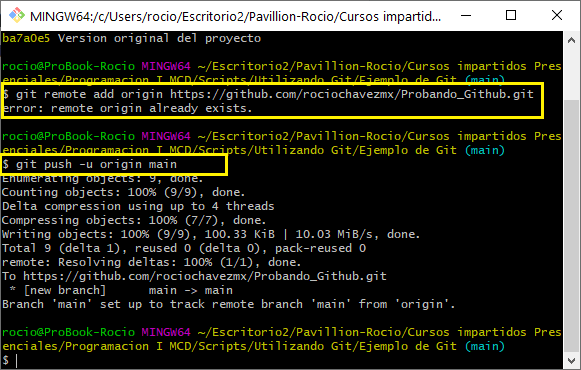

In [55]:
from IPython.display import Image
Image("error remote.png", width=600)

Si refrescamos la página de Github en la que nos encontrábamos, veremos que los archivos ya se encuentran cargados en Github

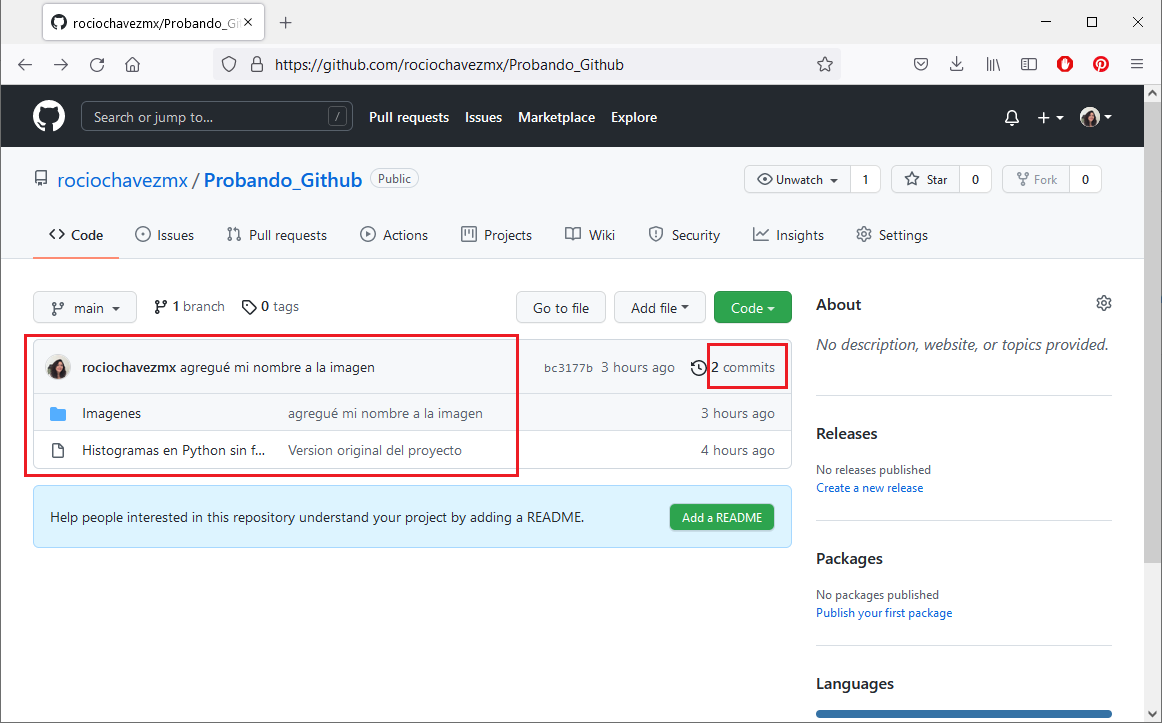

In [56]:
from IPython.display import Image
Image("Github actualizado.png", width=600)

Si damos clic en "2 commits", veremos la lista de cambios que se han llevado a cabo

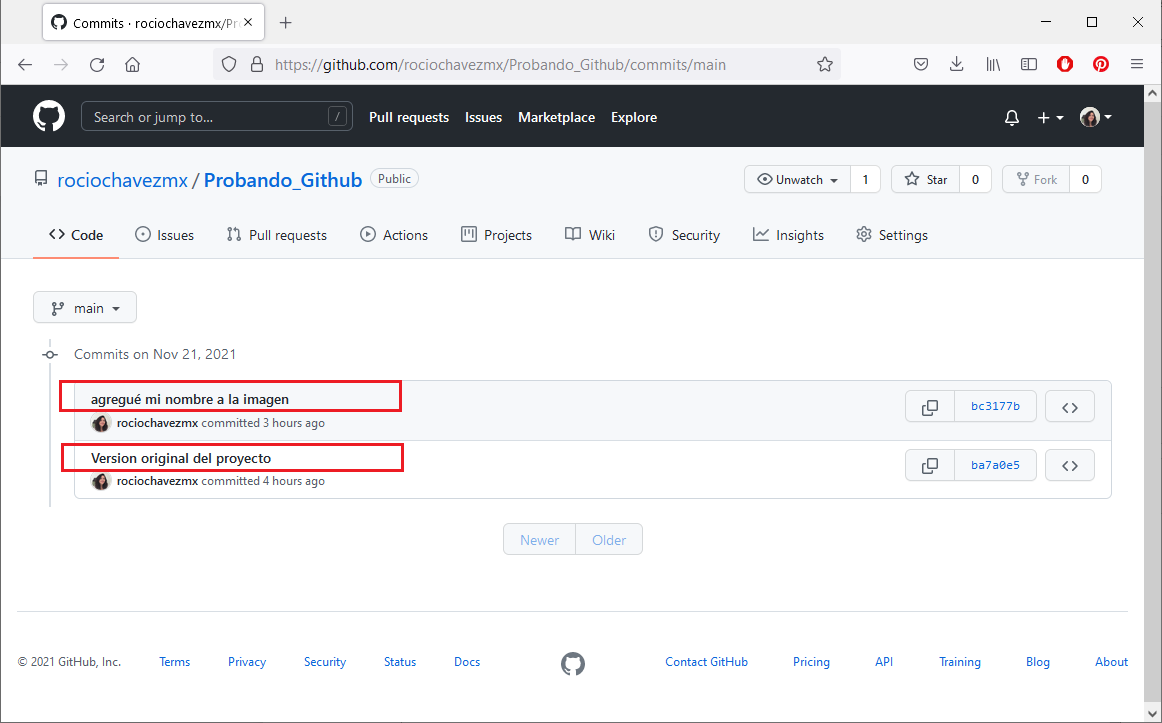

In [57]:
from IPython.display import Image
Image("commits.png", width=600)

## <font color= #0000FF> <i> Tarea

Utilizar un script de los que han hecho de tarea, hacerle al menos dos modificaciones, guardando los cambios en el repositorio local de git 

Crear un sitio de Github 

Subir a Github todas las versiones del archivo que modificaron